Testing time-it


In [6]:
def slope(c1, c2):
    x0, y0 = c1
    x1, y1 = c2
    return (y1 - y0) / (x1 - x0)


%timeit slope((0,0),(2,10))

44.8 ns ± 0.0924 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


,Algorithm,N,Time (s)
0,Quick Find,1000,0.008988
1,Quick Union,1000,0.000088
2,Weighted Quick Union,1000,0.000098
3,WQ Union + Path Compression,1000,0.000116
4,Quick Find,2000,0.036892
5,Quick Union,2000,0.000156
6,Weighted Quick Union,2000,0.000193
7,WQ Union + Path Compression,2000,0.000229
8,Quick Find,5000,0.230442
9,Quick Union,5000,0.000429


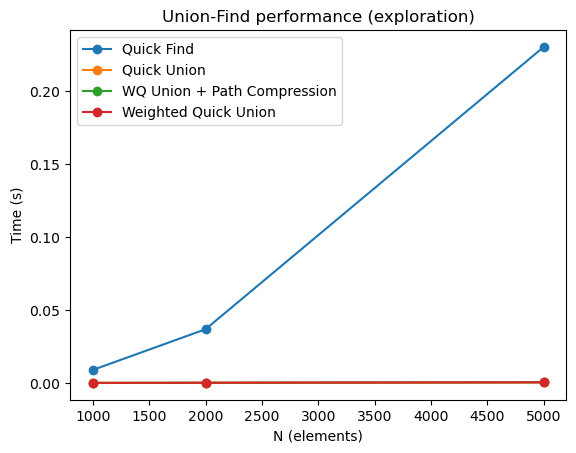

In [7]:
import random
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd

# Add src folder to sys.path
sys.path.append("../../src")

from unionfind import (
    QuickFind,
    QuickUnion,
    WeightedQuickUnion,
    WeightedQuickUnionPathCompression,
)


# --- helper to generate random union operations ---
def generate_ops(n, num_ops):
    return [(random.randint(0, n-1), random.randint(0, n-1)) for _ in range(num_ops)]

# --- measure runtime of a batch of unions ---
def measure_union(uf_class, n, ops):
    uf = uf_class(n)
    start = time.perf_counter()
    for p, q in ops:
        uf.union(p, q)
    end = time.perf_counter()
    return end - start

# --- experiment ---
n_values = [1000, 2000, 5000]   # keep small in exploration
algorithms = [
    ("Quick Find", QuickFind),
    ("Quick Union", QuickUnion),
    ("Weighted Quick Union", WeightedQuickUnion),
    ("WQ Union + Path Compression", WeightedQuickUnionPathCompression),
]

results = []
for n in n_values:
    ops = generate_ops(n, int(0.5 * n))  # ~half as many unions as elements
    for name, uf_class in algorithms:
        t = measure_union(uf_class, n, ops)
        results.append({"Algorithm": name, "N": n, "Time (s)": t})

# --- create a DataFrame ---
df = pd.DataFrame(results)
display(df)

# --- quick plot ---
for algo, group in df.groupby("Algorithm"):
    plt.plot(group["N"], group["Time (s)"], marker="o", label=algo)
plt.xlabel("N (elements)")
plt.ylabel("Time (s)")
plt.title("Union-Find performance (exploration)")
plt.legend()
plt.show()


Average runtime per algorithm:
Algorithm
Quick Find                     0.092107
Quick Union                    0.000224
WQ Union + Path Compression    0.000299
Weighted Quick Union           0.000257
Name: Time (s), dtype: float64


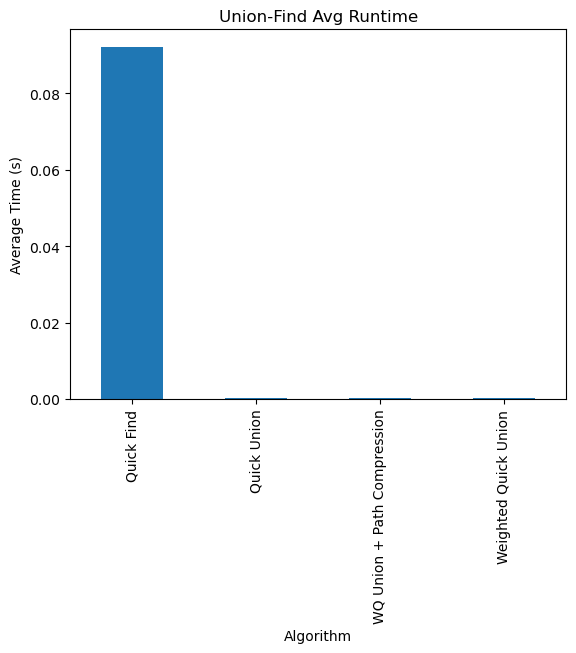

In [8]:
import matplotlib.pyplot as plt

# Show average runtime per algorithm
avg_times = df.groupby("Algorithm")["Time (s)"].mean()
print("Average runtime per algorithm:")
print(avg_times)

# Quick bar plot
avg_times.plot(kind="bar", ylabel="Average Time (s)", title="Union-Find Avg Runtime")
plt.show()
